In [21]:
import pandas as pd
import plotly.express as plx
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('ipl_2024_matches.csv')

In [23]:
data

,match_id,season,date,match_no,venue,city,team1,team2,toss_winner,toss_decision,...,innings2_wickets,winning_team,margin,won_by,player_of_the_match,team1_players,team2_players,umpire1,umpire2,umpire3
0,202401,2024,2024-03-22,1,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,RCB,CSK,RCB,bat,...,4.0,CSK,6.0,wickets,Mustafizur Rahman,"V Kohli, F du Plessis, RM Patidar, GJ Maxwell,...","RD Gaikwad, R Ravindra, AM Rahane, DJ Mitchell...",HAS Khalid,VK Sharma,Nitin Menon
1,202402,2024,2024-03-23,2,Maharaja Yadavindra Singh International Cricke...,Mohali,DC,PBKS,PBKS,field,...,6.0,PBKS,4.0,wickets,SM Curran,"DA Warner, MR Marsh, SD Hope, RR Pant, RK Bhui...","Arshdeep Singh, S Dhawan, JM Bairstow, P Simra...",J Madanagopal,NA Patwardhan,AG Wharf
2,202403,2024,2024-03-23,3,"Eden Gardens, Kolkata",Kolkata,KKR,SRH,SRH,field,...,7.0,KKR,4.0,runs,AD Russell,"Suyash Sharma, PD Salt, SP Narine, VR Iyer, SS...","T Natarajan, MA Agarwal, Abhishek Sharma, RA T...",R Pandit,YC Barde,BNJ Oxenford
3,202404,2024,2024-03-24,4,"Sawai Mansingh Stadium, Jaipur",Jaipur,RR,LSG,RR,bat,...,6.0,RR,20.0,runs,SV Samson,"YBK Jaiswal, JC Buttler, SV Samson, R Parag, S...","Q de Kock, KL Rahul, D Padikkal, A Badoni, DJ ...",A Totre,HDPK Dharmasena,KN Ananthapadmanabhan
4,202405,2024,2024-03-24,5,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,GT,MI,MI,field,...,9.0,GT,6.0,runs,B Sai Sudharsan,"MM Sharma, WP Saha, Shubman Gill, B Sai Sudhar...","L Wood, Ishan Kishan, RG Sharma, Naman Dhir, D...",VA Kulkarni,VK Sharma,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,202470,2024,2024-05-19,70,"Barsapara Cricket Stadium, Guwahati",Guwahati,RR,KKR,KK,field,...,NaN,NaN,NaN,NaN,NaN,"Yashasvi Jaiswal, Tom Kohler-Cadmore, Sanju Sa...","Rahmanullah Gurbaz, Sunil Narine, Venkatesh Iy...",Sai Darshan Kumar,Rohan Pandit,Anil Chaudhary
70,202471,2024,2024-05-21,71,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,SRH,KKR,SRH,bat,...,2.0,KKR,8.0,wickets,MA Starc,"TM Head, Abhishek Sharma, RA Tripathi, Nithish...","Rahmanullah Gurbaz, SP Narine, VR Iyer, SS Iye...",AK Chaudhary,R Pandit,KN Ananthapadmanabhan
71,202472,2024,2024-05-22,72,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,RCB,RR,RR,field,...,6.0,RR,4.0,wickets,R Ashwin,"V Kohli, F du Plessis, C Green, RM Patidar, GJ...","YS Chahal, YBK Jaiswal, T Kohler-Cadmore, SV S...",KN Ananthapadmanabhan,MV Saidharshan Kumar,AK Chaudhary
72,202473,2024,2024-05-24,73,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,SRH,RR,RR,field,...,7.0,SRH,36.0,runs,Shahbaz Ahmed,"TM Head, Abhishek Sharma, RA Tripathi, AK Mark...","YS Chahal, YBK Jaiswal, T Kohler-Cadmore, SV S...",Nitin Menon,VK Sharma,MA Gough


In [24]:
print(data.isnull().sum())

match_id               0
season                 0
date                   0
match_no               0
venue                  0
city                   0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
innings1_score         3
innings1_wickets       3
innings2_score         3
innings2_wickets       3
winning_team           3
margin                 3
won_by                 3
player_of_the_match    3
team1_players          2
team2_players          2
umpire1                0
umpire2                0
umpire3                1
dtype: int64


# Number of Matches won by each team in IPL 2024

In [25]:
figure = plx.bar(data,x =data['winning_team'])
figure.show()

# Number of matches won by defending or chasing

In [26]:
data['won_by']=data['won_by'].map({'Wickets':'Chasing','Runs':'Defending'})
won_by = data['won_by'].value_counts()
label = won_by.index
counts = won_by.values
colors = ['red','lightgreen']
fig = go.Figure(data =[go.Pie(labels = label,values=counts)])
fig.update_layout(title_text = " Number of matches won by defending or chasing")
fig.update_traces(hoverinfo = 'label+percent',textinfo = 'value',textfont_size = 30,marker = dict(colors = colors,line = dict(
color='black',width=3)))

# Player of the match in 2024

In [27]:
figure = plx.bar(data , x=data["player_of_the_match"],title = "player_of_the_match in 2024")
figure.show()

In [28]:
figure = plx.bar(data , x=data["toss_winner"],title = "Most Toss Winner teams in 2024")
figure.show()

Text(0, 0.5, 'Score')

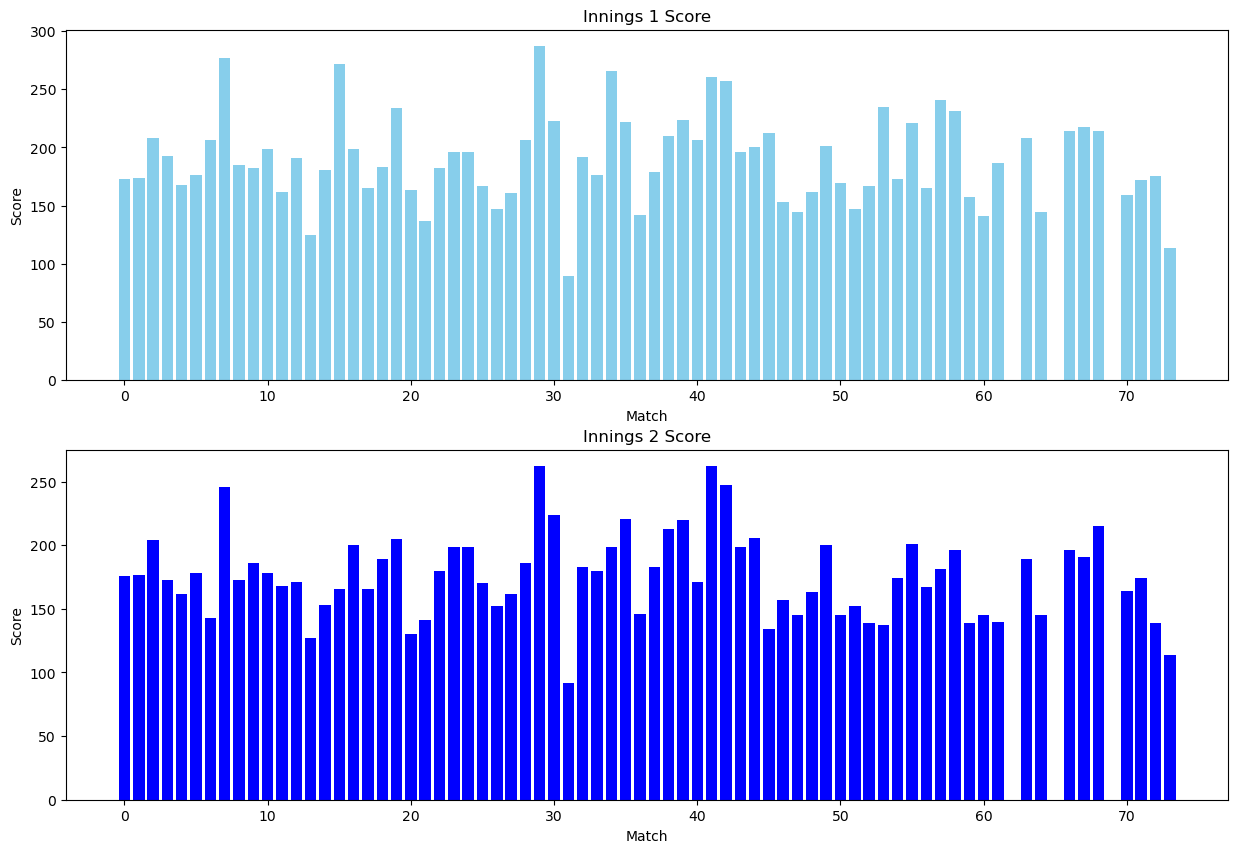

In [38]:
fig , (ax1,ax2) = plt.subplots(2,figsize=(15,10))

ax1.bar(data.index, data['innings1_score'], color='skyblue')
ax1.set_title('Innings 1 Score')
ax1.set_xlabel('Match')
ax1.set_ylabel('Score')

ax2.bar(data.index, data['innings2_score'], color='blue')
ax2.set_title('Innings 2 Score')
ax2.set_xlabel('Match')
ax2.set_ylabel('Score')

